In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,0.00149,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,0.00166,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df.drop(columns = 'class').values
y = df['class']

# normalize data using MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [3]:
from sklearn import datasets, metrics, cluster, mixture

# parameterize clustering
kmeans_algo = cluster.KMeans(n_clusters=3, random_state=2)

# learn the model
kmeans_model = kmeans_algo.fit(X)

# return centroids
kmeans_model.cluster_centers_


array([[0.79464037, 0.603728  , 0.54049164, ..., 0.26721662, 0.31368658,
        0.31401794],
       [0.80755259, 0.53742295, 0.48080936, ..., 0.18949852, 0.18885325,
        0.12028921],
       [0.84837075, 0.3340287 , 0.34780777, ..., 0.1847687 , 0.18204655,
        0.12733671]])

In [4]:
# check the produced clusters
y_pred = kmeans_model.labels_
print("Produced clusters:\n",y_pred.tolist())

Produced clusters:
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2

In [5]:
# compare against ground truth
y_true = df['class']
codes = {'0':0, '1':1}
print("True labels:\n",y_true.map(codes).tolist())

True labels:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
# compute silhouette
print("Silhouette:",metrics.silhouette_score(X, y_pred, metric='euclidean'))
print("Silhouette:",metrics.silhouette_score(X, y_pred, metric='manhattan'))
#print("Silhouette per instance:\n",metrics.silhouette_samples(X, y_pred))

Silhouette: 0.11362027575179426
Silhouette: 0.1440871604300737


In [7]:
# compute purity
import numpy as np
def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

print("Purity:",purity_score(y_true, y_pred))

Purity: 0.7671957671957672


In [8]:
#1)
for random in (0,1,2):
    # parameterize clustering
    kmeans_algo = cluster.KMeans(n_clusters=3, random_state=random)
    # learn the model
    kmeans_model = kmeans_algo.fit(X)
    
    # check the produced clusters
    y_pred = kmeans_model.labels_
    
    # compute silhouette
    print(f"Silhouette(random={random}, metric=euclidean):",metrics.silhouette_score(X, y_pred, metric='euclidean'))
    print(f"Silhouette(random={random}, metric=manhattan):",metrics.silhouette_score(X, y_pred, metric='manhattan'))
    print(f"Purity(random={random}):",purity_score(y_true, y_pred))
    print('-----')
    
    

Silhouette(random=0, metric=euclidean): 0.11362027575179426
Silhouette(random=0, metric=manhattan): 0.1440871604300737
Purity(random=0): 0.7671957671957672
-----
Silhouette(random=1, metric=euclidean): 0.11403554201377068
Silhouette(random=1, metric=manhattan): 0.14400051258512941
Purity(random=1): 0.7632275132275133
-----
Silhouette(random=2, metric=euclidean): 0.11362027575179426
Silhouette(random=2, metric=manhattan): 0.1440871604300737
Purity(random=2): 0.7671957671957672
-----


In [9]:
#2)
#The non-deterministic nature of K-Means is due to its random selection of data
# points as initial centroids

In [10]:
#3)
# parameterize clustering
kmeans_algo = cluster.KMeans(n_clusters=3, random_state=0)
# learn the model
kmeans_model = kmeans_algo.fit(X)
# check the produced clusters
y_pred = kmeans_model.labels_

In [49]:
from statistics import variance, pvariance
# 2 features with the highest variance
v = []
i = 0
for col in X.T:
    v.append([i,pvariance(col)])
    i += 1
    
print(max1 := max(v, key=lambda x: x[1]))
v.remove(max1)
print(max2 := max(v, key=lambda x: x[1]))

[371, 0.07656682348799522]
[749, 0.06824341596474662]


In [47]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold().fit(X)
#print("Feature variance =",selection.variances_)
print(max(selection.variances_))

0.0765668234879952


Text(0, 0.5, 'tqwt_kurtosisValue_dec_34')

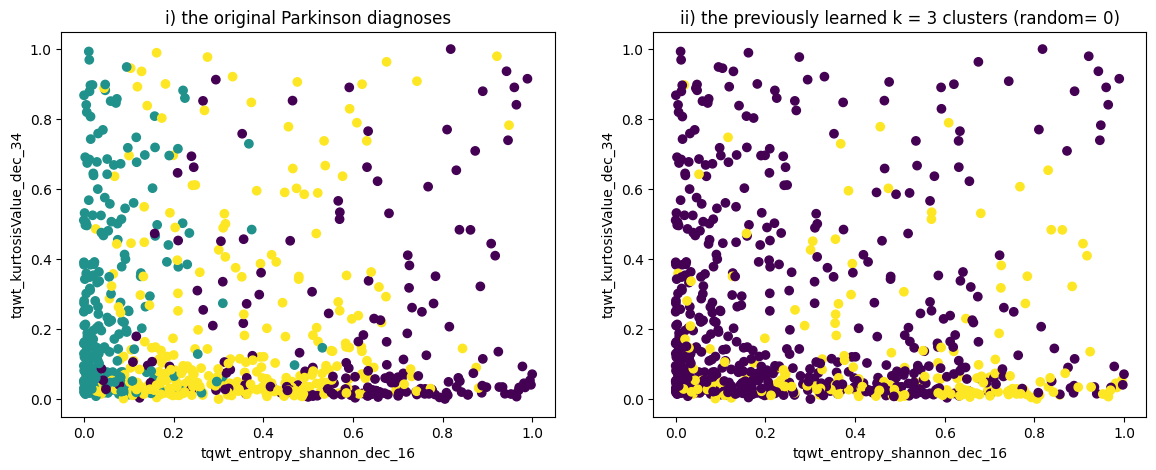

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.title('i) the original Parkinson diagnoses')
plt.scatter(X[:,371], X[:,749], c=y_pred)
plt.xlabel(df.columns[371])
plt.ylabel(df.columns[749])

code = {'1':20, '0':30}
# #print(y_true)
y_color = y_true.map(code).tolist()
#print(list(y_color))

plt.subplot(122)
plt.title('ii) the previously learned k = 3 clusters (random= 0)')
plt.scatter(X[:,371], X[:,749], c=y_color)
plt.xlabel(df.columns[371])
plt.ylabel(df.columns[749])